In [1]:

import numpy as np
import pylipid
import matplotlib.pyplot as plt
from pylipid.api import LipidInteraction
from pylipid.util import check_dir
print(pylipid.__version__)
##################################################################
##### This part needs changes according to your setting ##########
##################################################################
trajfile_list=["./step7_low.xtc"]
topfile_list=["./step7_low.pdb"] # topology file is needed when trajectory format does not
                                               # provide topology information. See mdtraj.load() for more
                                               # information.
dt_traj = None  # the timestep of trajectories. Need to use this param when trajectories are in a format
                # with no timestep information. Not necessary for trajectory formats of e.g. xtc, trr.
stride = 1   # tell pylipid to analyze every stride-th frame. Can be used to save computation memory
             # and speed up the calculation.

lipid = "POP5"   # residue name in the topology.
lipid_atoms = None  # all lipid atoms will be considered for interaction calculation.
cutoffs = [0.5, 0.8]  # dual-cutoff scheme for coarse-grained simulations. Single-cutoff scheme can be
                      # achieved by using the same value for two cutoffs.

nprot = 1   # if the simulation system has N copies of receptors, "nprot=N" will report interactions
            # averaged from the N copies, but "nprot=1" will ask PyLipID to report interaction for
            # each copy.

binding_site_size = 4  # binding site should contain at least four residues.

n_top_poses = 3     # write out num. of representative bound poses for each binding site.
n_clusters = "auto"  # cluster the bound poses for a binding site into num. of clusters. PyLipID
                     # will write out a pose conformation for each of the cluster. By default, i.e.
                     # "auto", PyLipID will use a density based clusterer to find possible clusters.

save_dir = None  # save at current working directory if it is None.
save_pose_format = "gro"  # format that poses are written in
save_pose_traj = True  # save all the bound poses in a trajectory for each binding site. The generated
                       # trajectories can take some disk space (up to a couple GB depending on your system).
save_pose_traj_format = "xtc"  # The format for the saved pose trajectories. Can take any format that is supported
                               # by mdtraj.

timeunit = "us"  # micro-sec. "ns" is nanosecond. Time unit used for reporting the results.
resi_offset = 0  # shift the residue index, useful for MARTINI models.

radii = None  # Radii of protein atoms/beads. In the format of python dictionary {atom_name: radius}
              # Used for calculation of binding site surface area. The van der waals radii of common atoms were
              # defined by mdtraj (https://github.com/mdtraj/mdtraj/blob/master/mdtraj/geometry/sasa.py#L56).
              # The radii of MARTINI 2.2 beads were included in PyLipID.

pdb_file_to_map = "step7_low.pdb" # if a pdb coordinate of the receptor is provided, a python script
                         # "show_binding_site_info.py" will be generated which maps the binding
                         # site information to the structure in PyMol. As PyMol cannot recognize
                         # coarse-grained structures, an atomistic structure of the receptor is needed.

fig_format = "pdf"  # format for all pylipid produced figures. Allow for formats that are supported by
                    # matplotlib.pyplot.savefig().

num_cpus = None  # the number of cpu to use when functions are using multiprocessing. By default,
                 # i.e. None, the functions will use up all the cpus available. This can use up all the memory in
                 # some cases.

/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.5.14


In [2]:
#####################################
###### no changes needed below ######
#####################################

#### calculate lipid interactions
li = LipidInteraction(trajfile_list, topfile_list=topfile_list, cutoffs=cutoffs, lipid=lipid,
                      lipid_atoms=lipid_atoms, nprot=1, resi_offset=resi_offset,
                      timeunit=timeunit, save_dir=save_dir, stride=stride, dt_traj=dt_traj)
li.collect_residue_contacts()
li.compute_residue_duration(residue_id=None)
li.compute_residue_occupancy(residue_id=None)
li.compute_residue_lipidcount(residue_id=None)
li.show_stats_per_traj(write_log=True, print_log=True)

Creating new director: /raid/lingling/6v01_pip2/6v01_kcnq_kcne3_cam/low_analysis/Interaction_POP5


CALCULATE RESIDUE LIPIDCOUNT: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:02<00:00, 950.43it/s]


###### Lipid: POP5
###### Lipid Atoms: None
###### Cutoffs: [0.5 0.8]
###### nprot: 1
###### Trajectories:
  ./step7_low.xtc
###### Coordinates:
  ./step7_low.pdb

########## POP5 interactions in 
########## ./step7_low.xtc 
10 residues that showed longest average interaction durations (us):
 89ARG   --  0.000  
 36ARG   --  0.000  
 23LYS   --  0.000  
 14PRO   --  0.000  
 31ARG   --  0.000  
 13ARG   --  0.000  
 146ARG  --  0.000  
 89ARG   --  0.000  
 37GLN   --  0.000  
 31TYR   --  0.000  
10 residues that showed highest lipid occupancy (100%):
 89ARG   --  93.95  
 92ARG   --  91.57  
  6ARG   --  79.25  
 10PHE   --  76.97  
 92ARG   --  74.95  
 89ARG   --  71.70  
 85TRP   --  71.57  
 80LYS   --  70.04  
 10PHE   --  68.91  
 93LYS   --  63.93  
10 residues that have the largest number of surrounding lipids (count):
 89ARG   --   1.38  
 29ARG   --   1.29  
 31ARG   --   1.25  
 80LYS   --   1.20  
 63PHE   --   1.19  
 10PHE   --   1.17  
 92ARG   --   1.15  
 10PHE   -- 

Creating new director: /raid/lingling/6v01_pip2/6v01_kcnq_kcne3_cam/low_analysis/Interaction_POP5/Residue_koffs_POP5


CALCULATE LIPIDCOUNT PER BINDING SITE: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.66it/s]

Creating new director: /raid/lingling/6v01_pip2/6v01_kcnq_kcne3_cam/low_analysis/Interaction_POP5/Binding_Sites_koffs_POP5



CALCULATE KOFF FOR BINDING SITES: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.18it/s]


Creating new director: /raid/lingling/6v01_pip2/6v01_kcnq_kcne3_cam/low_analysis/Interaction_POP5/Bound_Poses_POP5


CALCULATE BINDING SITE SURFACE AREA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:41<00:00, 41.83s/it]


Creating new director: /raid/lingling/6v01_pip2/6v01_kcnq_kcne3_cam/low_analysis/Interaction_POP5/Dataset_POP5


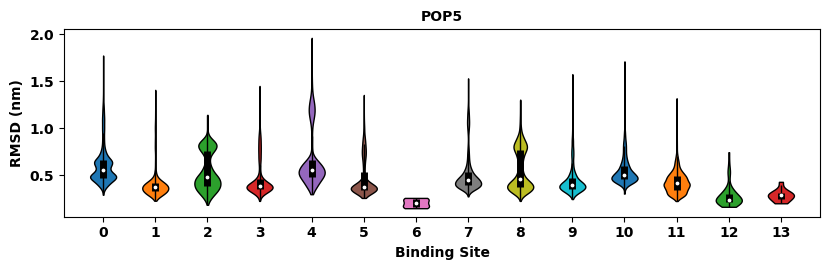

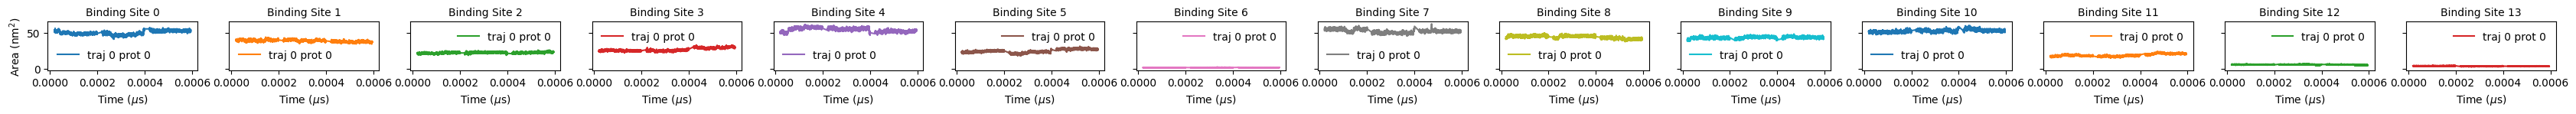

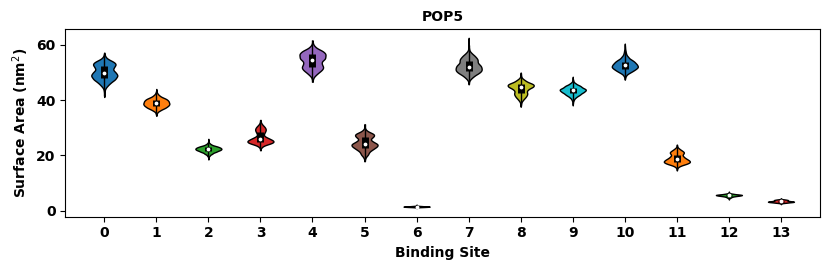

In [3]:
li.compute_residue_koff(residue_id=None, plot_data=True, fig_close=True,num_cpus=num_cpus)
li.compute_binding_nodes(threshold=binding_site_size, print_data=False)
if len(li.node_list) == 0:
    print("*"*50)
    print("No binding site detected! Skip analysis for binding sites.")
    print("*"*50)
else:
    li.compute_site_duration(binding_site_id=None)
    li.compute_site_occupancy(binding_site_id=None)
    li.compute_site_lipidcount(binding_site_id=None)
    li.compute_site_koff(binding_site_id=None, plot_data=True, fig_close=True,num_cpus=num_cpus)
    pose_traj, pose_rmsd_data = li.analyze_bound_poses(binding_site_id=None, pose_format=save_pose_format,
                                                       n_top_poses=n_top_poses, n_clusters=n_clusters,
                                                       num_cpus=num_cpus)
    # save pose trajectories
    if save_pose_traj:
        for bs_id in pose_traj.keys():
            pose_traj[bs_id].save("{}/Bound_Poses_{}/Pose_traj_BSid{}.{}".format(li.save_dir, li.lipid, bs_id,
                                                                          save_pose_traj_format))
    del pose_traj  # save memory space
    surface_area_data = li.compute_surface_area(binding_site_id=None, radii=radii)
    data_dir = check_dir(li.save_dir, "Dataset_{}".format(li.lipid))
    pose_rmsd_data.to_csv("{}/Pose_RMSD_data.csv".format(data_dir), index=False, header=True)
    surface_area_data.to_csv("{}/Surface_Area_data.csv".format(data_dir), index=True, header=True)
    li.write_site_info(sort_residue="Residence Time")

if pdb_file_to_map is not None:
    li.save_pymol_script(pdb_file_to_map)

In [5]:
#### write and save data
for item in ["Dataset", "Duration", "Occupancy", "Lipid Count", "CorrCoef"]:
    li.save_data(item=item)
for item in ["Residence Time", "Duration", "Occupancy", "Lipid Count"]:
    li.save_coordinate(item=item)
for item in ["Residence Time", "Duration", "Occupancy", "Lipid Count"]:
    li.plot(item=item, fig_close=True)
    li.plot_logo(item=item, fig_close=True)
#### plot binding site comparison.
if len(li.node_list) > 0:
    for item in ["Duration BS", "Occupancy BS"]:
        li.save_data(item=item)

        ylabel_timeunit = 'ns' if li.timeunit == "ns" else r"$\mu$s"
        ylabel_dict = {"Residence Time": "Residence Time ({})".format(ylabel_timeunit),
                       "Duration": "Duration ({})".format(ylabel_timeunit),
                       "Occupancy": "Occuoancy (100%)",
                       "Lipid Count": "Lipid Count (num.)"}

        # plot No. 1
        binding_site_IDs = np.sort(
                 [int(bs_id) for bs_id in li.dataset["Binding Site ID"].unique() if bs_id != -1])
        for item in ["Residence Time", "Duration", "Occupancy", "Lipid Count"]:
            item_values = np.array(
                      [li.dataset[li.dataset["Binding Site ID"]==bs_id]["Binding Site {}".format(item)].unique()[0]
                       for bs_id in binding_site_IDs])
            fig, ax = plt.subplots(1, 1, figsize=(len(li.node_list)*0.5, 2.6))
            ax.scatter(np.arange(len(item_values)), np.sort(item_values)[::-1], s=50, color="red")
            ax.set_xticks(np.arange(len(item_values)))
            sorted_index = np.argsort(item_values)[::-1]
            ax.set_xticklabels(binding_site_IDs[sorted_index])
            ax.set_xlabel("Binding Site ID", fontsize=12)
            ax.set_ylabel(ylabel_dict[item], fontsize=12)
            for label in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
                plt.setp(label, fontsize=12, weight="normal")
            plt.tight_layout()
            plt.savefig("{}/{}_{}_v_binding_site.{}".format(li.save_dir, li.lipid, "_".join(item.split()), fig_format),
                        dpi=200)
            plt.close()

        # plot No. 2
        binding_site_IDs_RMSD = np.sort([int(bs_id) for bs_id in binding_site_IDs
                                        if f"Binding Site {bs_id}" in pose_rmsd_data.columns])
        RMSD_averages = np.array(
                     [pose_rmsd_data[f"Binding Site {bs_id}"].dropna(inplace=False).mean()
                      for bs_id in binding_site_IDs_RMSD])
        fig, ax = plt.subplots(1, 1, figsize=(len(li.node_list)*0.5, 2.6))
        ax.scatter(np.arange(len(RMSD_averages)), np.sort(RMSD_averages)[::-1], s=50, color="red")
        ax.set_xticks(np.arange(len(RMSD_averages)))
        sorted_index = np.argsort(RMSD_averages)[::-1]
        ax.set_xticklabels(binding_site_IDs_RMSD[sorted_index])
        ax.set_xlabel("Binding Site ID", fontsize=12)
        ax.set_ylabel("RMSD (nm)", fontsize=12)
        for label in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
            plt.setp(label, fontsize=12, weight="normal")
        plt.tight_layout()
        plt.savefig("{}/{}_RMSD_v_binding_site.{}".format(li.save_dir, li.lipid, fig_format), dpi=200)
        plt.close()

        # plot No. 3
        surface_area_averages = np.array(
                       [surface_area_data["Binding Site {}".format(bs_id)].dropna(inplace=False).mean()
                        for bs_id in binding_site_IDs])
        fig, ax = plt.subplots(1, 1, figsize=(len(li.node_list)*0.5, 2.6))
        ax.scatter(np.arange(len(surface_area_averages)), np.sort(surface_area_averages)[::-1], s=50, color="red")
        ax.set_xticks(np.arange(len(surface_area_averages)))
        sorted_index = np.argsort(surface_area_averages)[::-1]
        ax.set_xticklabels(binding_site_IDs[sorted_index])
        ax.set_xlabel("Binding Site ID", fontsize=12)
        ax.set_ylabel(r"Surface Area (nm$^2$)", fontsize=12)
        for label in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
            plt.setp(label, fontsize=12, weight="normal")
        plt.tight_layout()
        plt.savefig("{}/{}_surface_area_v_binding_site.{}".format(li.save_dir, li.lipid, fig_format), dpi=200)
        plt.close()

        # plot No. 4
        res_time_BS = np.array(
                  [li.dataset[li.dataset["Binding Site ID"]==bs_id]["Binding Site Residence Time"].unique()[0]
                   for bs_id in binding_site_IDs_RMSD])
        fig, ax = plt.subplots(1, 1, figsize=(len(li.node_list)*0.5, 2.6))
        ax.scatter(res_time_BS, RMSD_averages, s=50, color="red")
        ax.set_xlabel(ylabel_dict["Residence Time"], fontsize=12)
        ax.set_ylabel("RMSD (nm)", fontsize=12)
        for label in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
            plt.setp(label, fontsize=12, weight="normal")
        plt.tight_layout()
        plt.savefig("{}/{}_Residence_Time_v_RMSD.{}".format(li.save_dir, li.lipid, fig_format), dpi=200)
        plt.close()

        # plot No. 5
        res_time_BS = np.array(
                  [li.dataset[li.dataset["Binding Site ID"]==bs_id]["Binding Site Residence Time"].unique()[0]
                   for bs_id in binding_site_IDs])
        fig, ax = plt.subplots(1, 1, figsize=(len(li.node_list)*0.5, 2.6))
        ax.scatter(res_time_BS, surface_area_averages, s=50, color="red")
        ax.set_xlabel(ylabel_dict["Residence Time"], fontsize=12)
        ax.set_ylabel(r"Surface Area (nm$^2$)", fontsize=12)
        for label in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
            plt.setp(label, fontsize=12, weight="normal")
        plt.tight_layout()
        plt.savefig("{}/{}_Residence_Time_v_surface_area.{}".format(li.save_dir, li.lipid, fig_format), dpi=200)
        plt.close()